# Loopless FBA

In [1]:
%run 01-model.ipynb

'' is not a valid SBML 'SId'.


In [2]:
%matplotlib inline
import plot_helper

import cobra.test
from cobra import Reaction, Metabolite, Model
from cobra.flux_analysis.loopless import add_loopless, loopless_solution
from cobra.flux_analysis import pfba

In [3]:
model.objective = model.reactions.psiM 
nominal = model.optimize()
loopless = loopless_solution(model)

In [4]:
import pandas
df = pandas.DataFrame(dict(loopless=loopless.fluxes, nominal=nominal.fluxes))

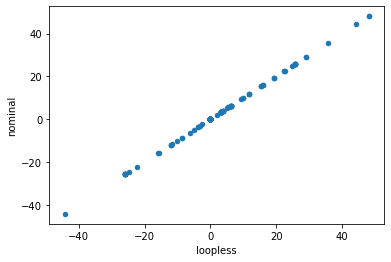

In [5]:
df.plot.scatter(x='loopless', y='nominal')

In [6]:
solution = pfba(model)
print("parsimonious solution: status = " + solution.status)
print("loopless solution flux: psiM = %.1f" % solution.fluxes["psiM"])

parsimonious solution: status = optimal
loopless solution flux: psiM = 3.1
